<a href="https://colab.research.google.com/github/dhamvi01/Reuter-Multiclass-classification/blob/master/Reuters_Multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 0s 0us/step


In [2]:
len(train_data)
len(test_data)

2246

In [0]:
#train_data[0]

In [0]:
import numpy as np
def vs(ss,d=10000):
  rs = np.zeros((len(ss),d))
  for i,s in enumerate(ss):
    rs[i, s] = 1
  return rs

In [0]:
x_train = vs(train_data)
x_test = vs(test_data)

In [0]:
def to_one_hot(labels, d=46):
  rs = np.zeros((len(labels), d))
  for i, label in enumerate(labels):
    rs[i,label] = 1.
  return rs

In [0]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [0]:
from keras import models
from keras import layers

In [11]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [12]:
model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

In [0]:
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [19]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data = (x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20





7982/7982 [==============================] - 2s 196us/step - loss: 2.5703 - acc: 0.4994 - val_loss: 1.7654 - val_acc: 0.6570
Epoch 2/20
7982/7982 [==============================] - 1s 117us/step - loss: 1.4245 - acc: 0.7101 - val_loss: 1.3070 - val_acc: 0.7000
Epoch 3/20
7982/7982 [==============================] - 1s 116us/step - loss: 1.0528 - acc: 0.7808 - val_loss: 1.1188 - val_acc: 0.7550
Epoch 4/20
7982/7982 [==============================] - 1s 117us/step - loss: 0.8285 - acc: 0.8251 - val_loss: 1.0376 - val_acc: 0.7760
Epoch 5/20
7982/7982 [==============================] - 1s 117us/step - loss: 0.6648 - acc: 0.8614 - val_loss: 0.9666 - val_acc: 0.7950
Epoch 6/20
7982/7982 [==============================] - 1s 115us/step - loss: 0.5354 - acc: 0.8913 - val_loss: 0.9342 - val_acc: 0.8130
Epoch 7/20
7982/7982 [==============================] - 1s 114us/step - loss: 0.4352 - acc: 0.9124 - val_loss: 0.8951 - val_acc: 0.

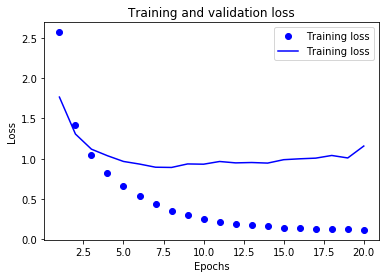

In [24]:
import matplotlib.pyplot as plt
loss =  history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Training loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

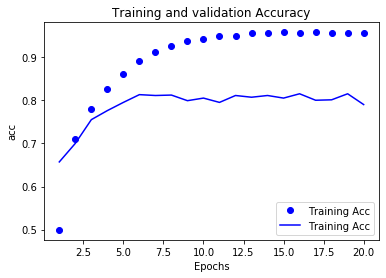

In [27]:
acc =  history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,len(loss) + 1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Training Acc')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [29]:
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data = (x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 120us/step - loss: 0.0963 - acc: 0.9589 - val_loss: 1.2848 - val_acc: 0.7850
Epoch 2/9
7982/7982 [==============================] - 1s 119us/step - loss: 0.0970 - acc: 0.9587 - val_loss: 1.3578 - val_acc: 0.7760
Epoch 3/9
7982/7982 [==============================] - 1s 119us/step - loss: 0.0916 - acc: 0.9584 - val_loss: 1.3415 - val_acc: 0.7840
Epoch 4/9
7982/7982 [==============================] - 1s 120us/step - loss: 0.0974 - acc: 0.9599 - val_loss: 1.2612 - val_acc: 0.7920
Epoch 5/9
7982/7982 [==============================] - 1s 123us/step - loss: 0.0873 - acc: 0.9594 - val_loss: 1.4120 - val_acc: 0.7810
Epoch 6/9
7982/7982 [==============================] - 1s 122us/step - loss: 0.0951 - acc: 0.9582 - val_loss: 1.3239 - val_acc: 0.7840
Epoch 7/9
7982/7982 [==============================] - 1s 120us/step - loss: 0.0912 - acc: 0.9588 - val_loss: 1.4525 - val_acc: 0.7720
Epoch 8

In [30]:
result = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 90us/step


In [31]:
result

[1.5255568178232928, 0.7769367764915405]

### Make prediction for 46 classes

In [34]:
predictions = model.predict(x_test)
predictions[0].shape

(46,)

### Maximum probablity for the class

In [35]:
np.argmax(predictions[0])

3

### Sum of probablitis for 46 class

In [37]:
int(np.sum(predictions[0]))

1